In [1]:

# Load the dataset
import pandas as pd

df = pd.read_csv('dataset/Desharnais_expanded_300.csv')

# Display first 5 rows
print(df.head())
df.columns

   id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0   3        0        0           0       86       4    2964           190   
1  52       55        1           3       86      12    1047           130   
2  15       12        4           4       85       9    5984           228   
3  39       35       -1          -1       87       8    5344           260   
4  68       67        2           4       87      15    6894           325   

   Entities  PointsNonAdjust  Adjustment  PointsAjust  Language  
0       121              316          33          306         1  
1        84              221           4          140         2  
2       115              339          28          311         1  
3       148              402          24          362         1  
4       190              503          35          498         2  


Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

In [2]:
# Step: Data quality audit on the 300-row dataset (no changes yet)

import pandas as pd

# If your DataFrame is named df, skip the next line. Otherwise, load from CSV:
# df = pd.read_csv('dataset/Desharnais_expanded_300.csv')

# 1) Basic shape & dtypes
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)

# 2) Missing values per column
print("\nMissing values per column:\n", df.isnull().sum())

# 3) Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 4) Sanity checks for specific columns
non_negative_cols = ['TeamExp','ManagerExp','YearEnd','Length','Effort',
                     'Transactions','Entities','PointsNonAdjust','Adjustment',
                     'PointsAjust']
for col in non_negative_cols:
    if col in df.columns:
        n_neg = (df[col] < 0).sum()
        print(f"{col}: negatives = {n_neg}")

# 5) Check sentinel values like -1 in experience columns
for col in ['TeamExp','ManagerExp']:
    if col in df.columns:
        n_minus1 = (df[col] == -1).sum()
        print(f"{col}: -1 count = {n_minus1}")

# 6) Quick look at categorical distributions (e.g., Language)
if 'Language' in df.columns:
    print("\nLanguage value counts:\n", df['Language'].value_counts(dropna=False))


Shape: (300, 13)

Dtypes:
 id                 int64
Project            int64
TeamExp            int64
ManagerExp         int64
YearEnd            int64
Length             int64
Effort             int64
Transactions       int64
Entities           int64
PointsNonAdjust    int64
Adjustment         int64
PointsAjust        int64
Language           int64
dtype: object

Missing values per column:
 id                 0
Project            0
TeamExp            0
ManagerExp         0
YearEnd            0
Length             0
Effort             0
Transactions       0
Entities           0
PointsNonAdjust    0
Adjustment         0
PointsAjust        0
Language           0
dtype: int64

Number of duplicate rows: 0
TeamExp: negatives = 10
ManagerExp: negatives = 10
YearEnd: negatives = 0
Length: negatives = 0
Effort: negatives = 25
Transactions: negatives = 0
Entities: negatives = 0
PointsNonAdjust: negatives = 0
Adjustment: negatives = 0
PointsAjust: negatives = 0
TeamExp: -1 count = 10
ManagerExp: 

### Dataset Notes
- **Columns meaning**:  
  - `TeamExp`, `ManagerExp`: experience levels of team and manager.  
  - `Length`: project duration.  
  - `Effort`: target variable (person-hours/months).  
  - `Transactions`, `Entities`: project size indicators.  
  - `PointsNonAdjust`, `Adjustment`, `PointsAjust`: function points before/after adjustment.  
  - `Language`: programming language type (encoded).  

- **Dataset origin**:  
  The original **Desharnais dataset** had about **81 rows**.  
  We expanded it to **300 rows** using **simulation techniques** to make it larger.  
  Because of this artificial expansion, some **noise** was introduced.

- **Why negative values?**  
  - `-1` in `TeamExp` or `ManagerExp` = missing/unknown values in the original schema.  
  - Negative `Effort` is an artifact of the simulation noise (not realistic).  

- **Cleaning to be applied:**  
  - Remove rows with `TeamExp = -1` or `ManagerExp = -1`.  
  - Remove (or impute) rows with negative `Effort` to ensure realistic values.


In [3]:
# Step 1: Remove rows with -1 values in TeamExp or ManagerExp
df_cleaned = df[(df['TeamExp'] != -1) & (df['ManagerExp'] != -1)]

# Step 2: Remove rows with negative Effort
df_cleaned = df_cleaned[df_cleaned['Effort'] >= 0]

# Step 3: Print shape after cleaning
print("Shape after cleaning:", df_cleaned.shape)

# Step 4: Quick check to confirm no invalid values remain
print("Remaining negatives in TeamExp:", (df_cleaned['TeamExp'] < 0).sum())
print("Remaining negatives in ManagerExp:", (df_cleaned['ManagerExp'] < 0).sum())
print("Remaining negatives in Effort:", (df_cleaned['Effort'] < 0).sum())


Shape after cleaning: (258, 13)
Remaining negatives in TeamExp: 0
Remaining negatives in ManagerExp: 0
Remaining negatives in Effort: 0


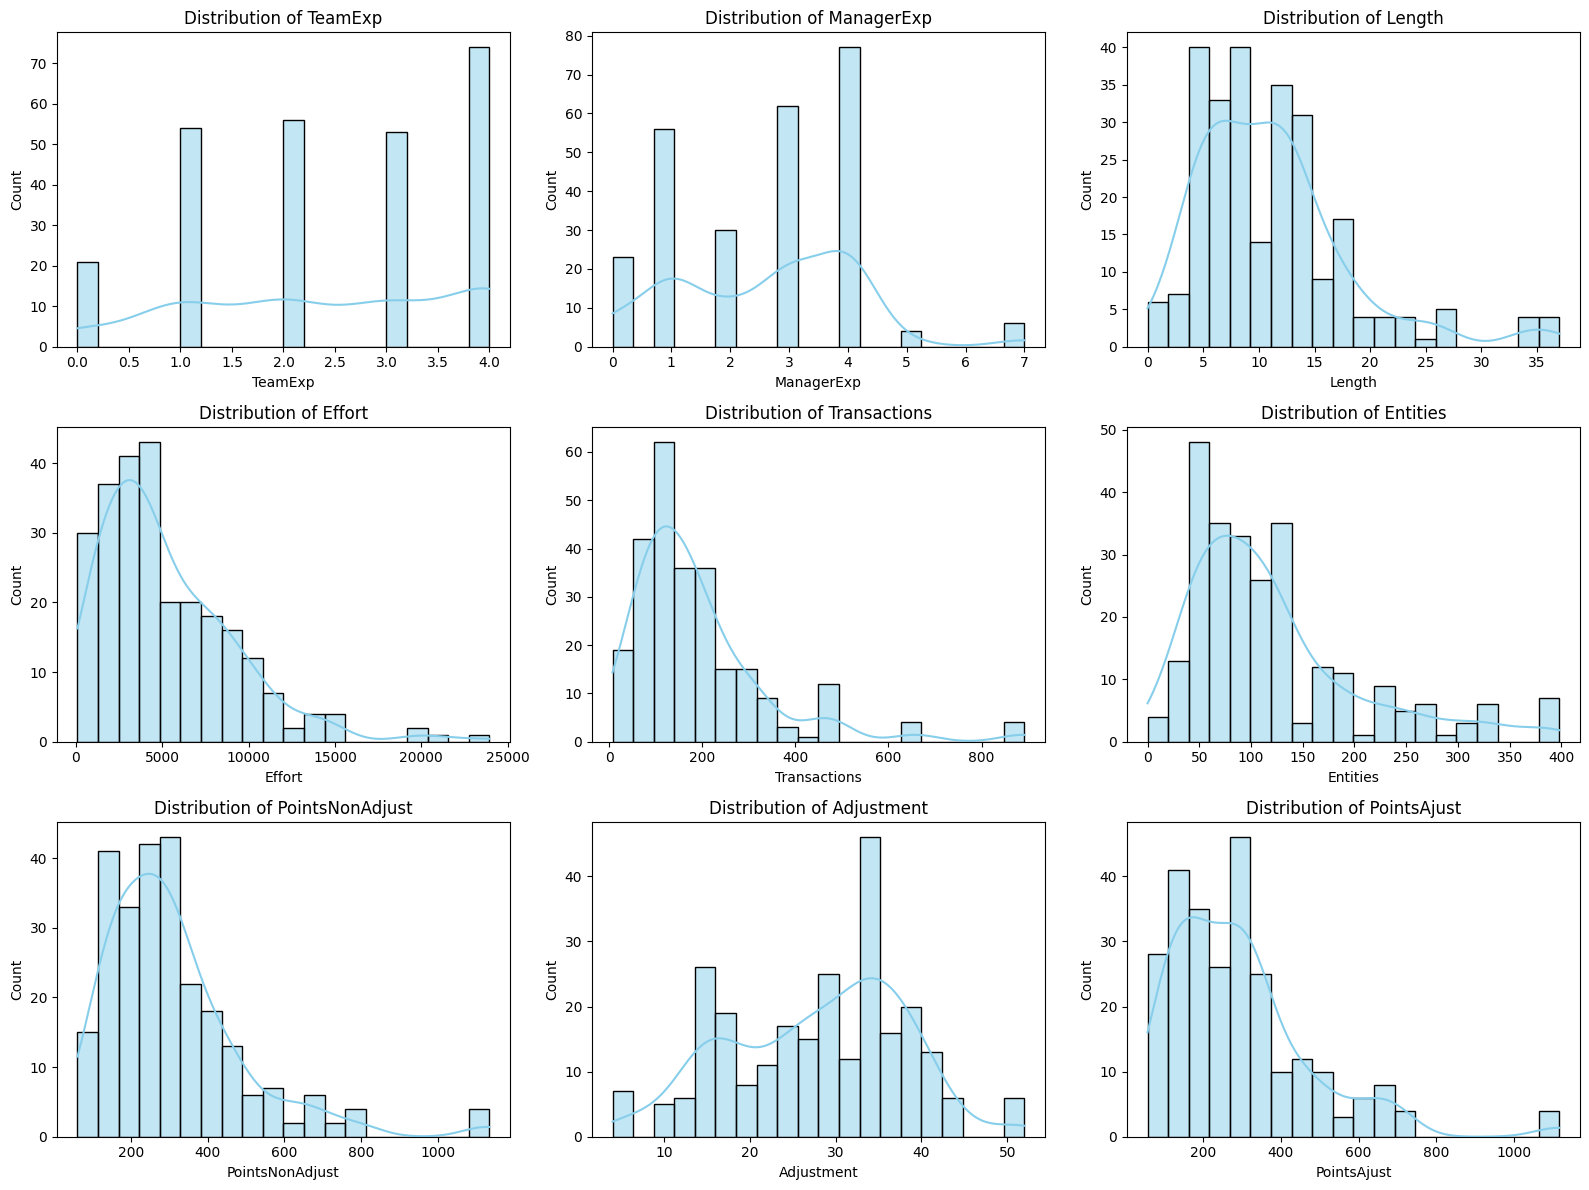

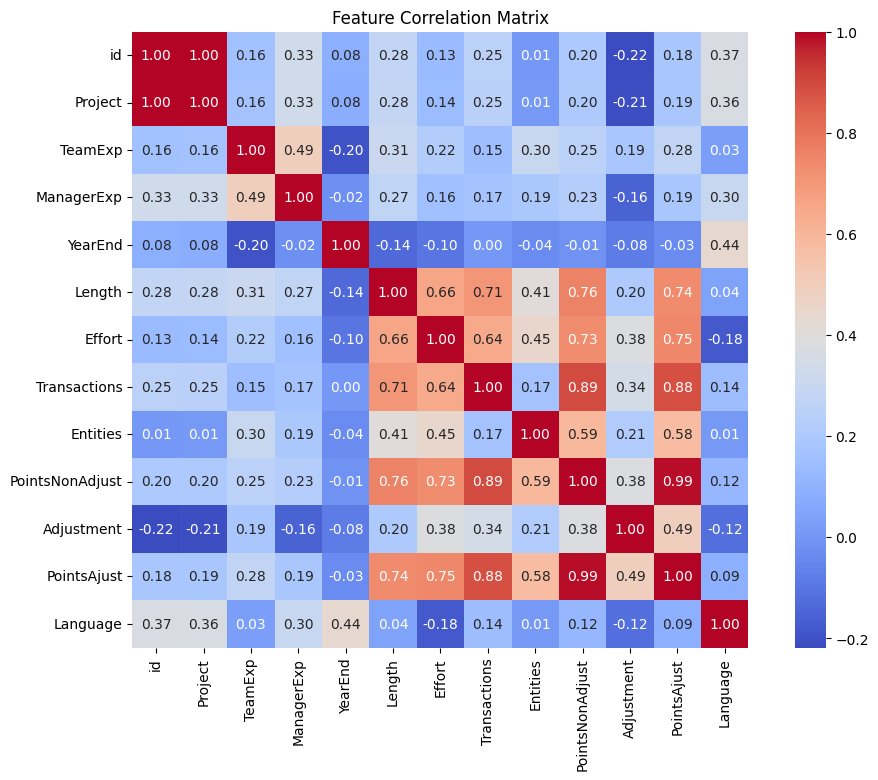

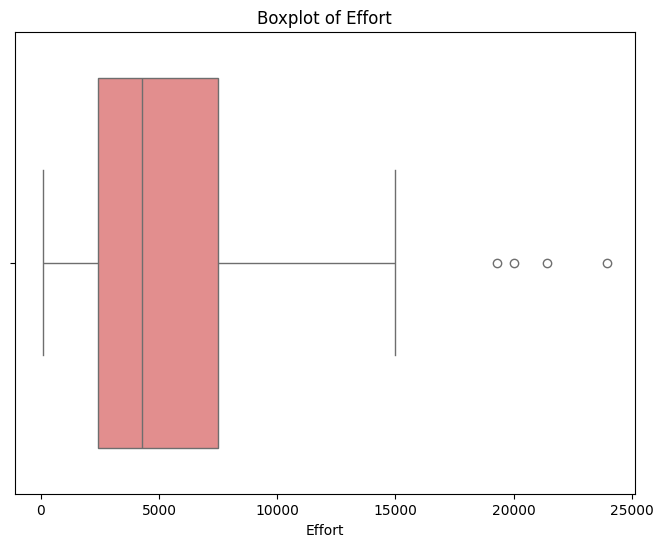

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot distributions of numeric features
numeric_cols = ['TeamExp', 'ManagerExp', 'Length', 'Effort',
                'Transactions', 'Entities', 'PointsNonAdjust',
                'Adjustment', 'PointsAjust']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Step 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 3: Boxplot for Effort (to check outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Effort'], color="lightcoral")
plt.title("Boxplot of Effort")
plt.show()


### Exploratory Data Analysis (EDA) Summary

1. **Feature Distributions**  
   - Most features (Effort, Transactions, Entities, Points) are right-skewed.  
   - TeamExp and ManagerExp values are concentrated in the lower range (0–4).  
   - Project Length is typically between 5–15 months.

2. **Correlation Matrix**  
   - Effort has strong positive correlations with:  
     - Transactions (0.64)  
     - PointsNonAdjust (0.73)  
     - PointsAjust (0.75)  
     - Length (0.66)  
   - TeamExp and ManagerExp show weak correlation with Effort, suggesting low predictive power.

3. **Outlier Detection (Boxplot of Effort)**  
   - Most projects fall between 2000–8000 effort hours, with a median around 4500.  
   - Projects above 20,000 hours appear as outliers and could negatively impact models.  
   - Handling strategies: removal or log transformation.

4. **Effort Distribution (Histogram + KDE)**  
   - The Effort variable is right-skewed.  
   - Majority of projects cluster around 4000–5000 hours.  
   - Long tail exists due to a few very large projects.  
   - Histogram shows the distribution shape, while Boxplot highlights extreme outliers.
